# Marketing Analytics: Analysing Campaign Performance

The following project is based on the Marketing Analytics Dataset by Jack Doud on Kaggle: 
https://www.kaggle.com/jackdaoud/marketing-data. 

We'll be attempting the Business Analysis with EDA Task on this dataset:
https://www.kaggle.com/jackdaoud/marketing-data/tasks?taskId=2986

The Task in brief: The CMO has called on us to figure out why the recent marketing campaigns have been ineffective and to provide data driven solutions. It highlights an approach to go about the task with certain smaller tasks spread over different sections, viz, EDA, Statistical Analysis, and finally - Data Visualisation. And to use the insights from those sections to come up with our final conculusions. 

## Initial Data Setup and Exploration

This   deals with the basic setup viz. loading and basic formatting of data.The aim is to get a general understanding of the dataset to better proceed with the stipulated tasks.

Here, we'll be covering the sub-tasks in the exploratory data analysis section. They are:

1. Are there any null values or outliers? How will you wrangle/handle them?
2. Are there any variables that warrant transformations?
3. Are there any useful variables that you can engineer with the given data?
4. Do you notice any patterns or anomalies in the data? Can you plot them?

Before that, we'll do the initial setup of importing data and inspecting its first few rows in order to prepare them for analysis.

#### Setup & Preparation

In [393]:
# Setup 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
import statsmodels.formula.api as sm

In [394]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

df = pd.read_csv('marketing_data.csv')
df.head()
# df.dtypes

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In summary, the data can be categorized into three types: we have the customer data which explains their education, marital status, country, income levels, and if they have any kids along with the date of their first order. The second category is their purchase habits, giving us the dollar amount spent on the different kinds of products they purchased. And finally the campaign data which tells us if that particular campaign resluted in business from that person.


Let us first preview the data and carry out some data preparation steps. Post which, we'll go on to complete the sub tasks in this section. 

First observations:

* Some of the column names seem to have extra whitespaces.
* The income has dollar signs attached to it which should be stripped and the data be converted to numeric.
* The dt_customer column is in the form of string. 


####  Data Cleaning

In [395]:
# Datatype Conversions


df.columns = df.columns.str.replace(' ','')          # Stripping whitespaces off columns

# Coverting Income to the Float datatype

df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',','').astype('float', copy = 'False')
df['Income'] = pd.to_numeric(df['Income'], errors = 'coerce')

# Converting dt_customer to datetime

df.Dt_Customer = pd.to_datetime(df.Dt_Customer,format = '%d%m%Y', errors = 'ignore')

# Converting Year_Birth to datetime

# df.Year_Birth = pd.to_datetime(df.Year_Birth).dt.year

# df.dtypes
# df.head

In [396]:
# df.dtypes
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


##  Section 01: Exploratory Data Analysis

The section covers the follwing subtasks:

* Are there any null values or outliers? How will you wrangle/handle them?
* Are there any variables that warrant transformations?
* Are there any useful variables that you can engineer with the given data?
* Do you notice any patterns or anomalies in the data? Can you plot them?

###  1. Handling Missing Values & Outliers

We'll first begin with handling outliers, for this we'll use boxplot to plot our all our numeric datatypes and identify troublesome outliers.

Year_Birth                AxesSubplot(0.125,0.749828;0.133621x0.130172)
Income                 AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Kidhome                 AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Teenhome               AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Recency                AxesSubplot(0.766379,0.749828;0.133621x0.130172)
MntWines                  AxesSubplot(0.125,0.593621;0.133621x0.130172)
MntFruits              AxesSubplot(0.285345,0.593621;0.133621x0.130172)
MntMeatProducts         AxesSubplot(0.44569,0.593621;0.133621x0.130172)
MntFishProducts        AxesSubplot(0.606034,0.593621;0.133621x0.130172)
MntSweetProducts       AxesSubplot(0.766379,0.593621;0.133621x0.130172)
MntGoldProds              AxesSubplot(0.125,0.437414;0.133621x0.130172)
NumDealsPurchases      AxesSubplot(0.285345,0.437414;0.133621x0.130172)
NumWebPurchases         AxesSubplot(0.44569,0.437414;0.133621x0.130172)
NumCatalogPurchases    AxesSubplot(0.606034,0.437414;0.133621x0.

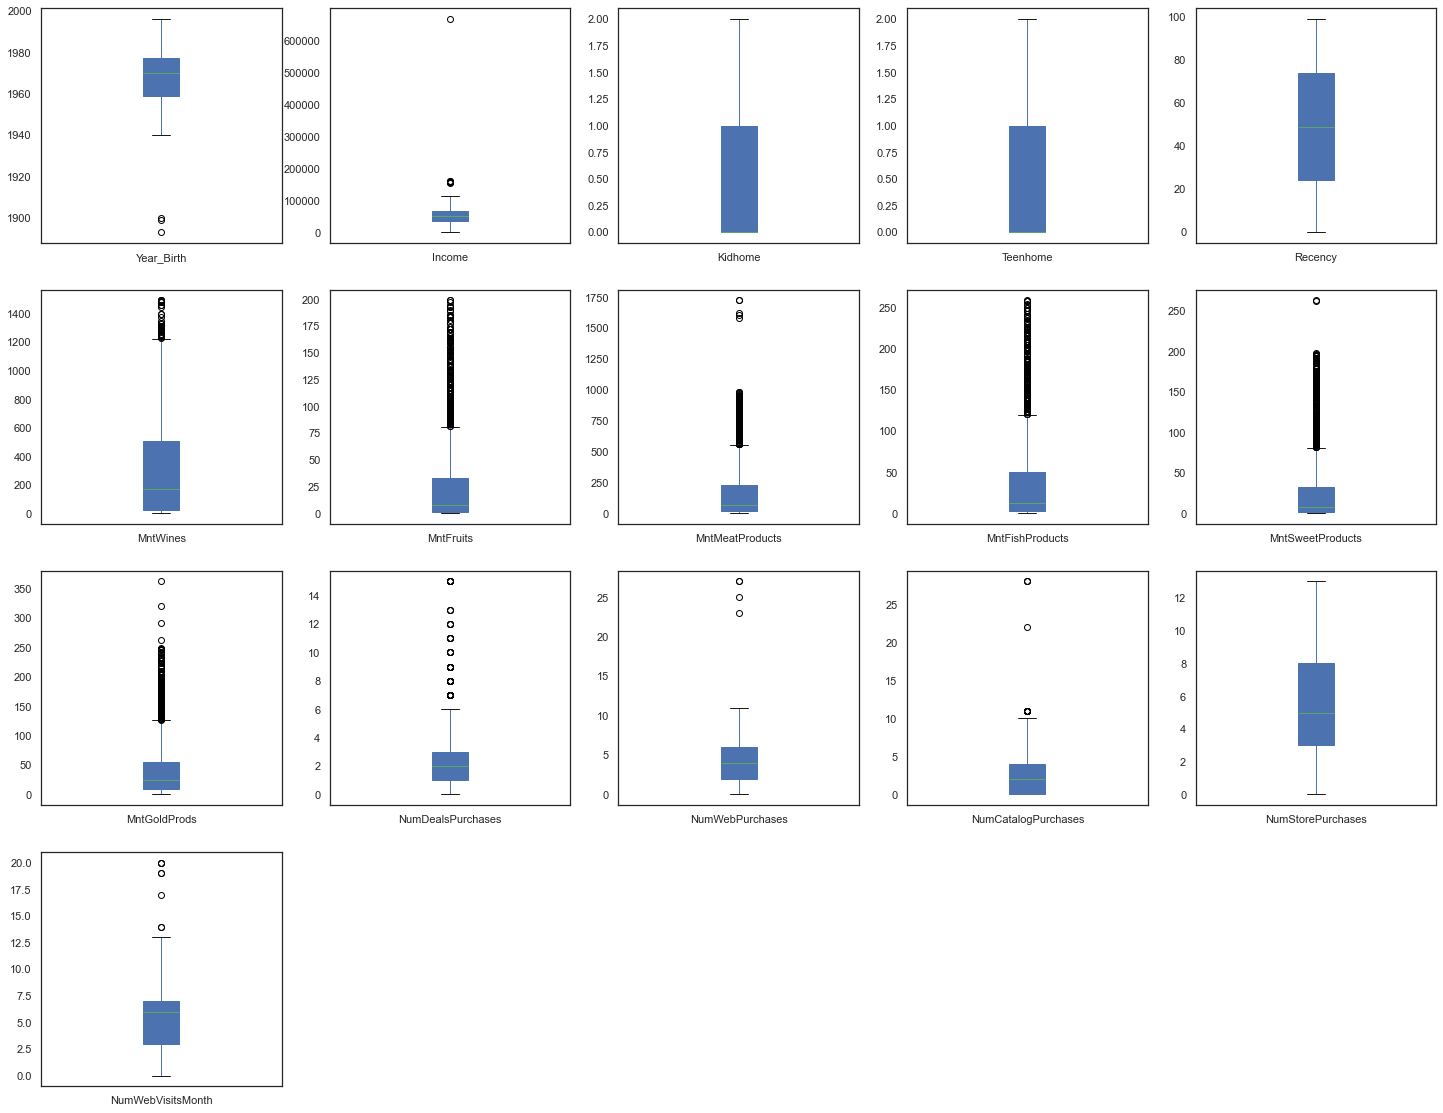

In [397]:
# select columns to plot
df_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                              'Response', 'Complain']).select_dtypes(include=np.number)

# subplots
df_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(25,25), patch_artist=True)

We see 2 major outliers in the above set of graphs, one is people born before 1920, and the second is an indivisual with income greater than $ 600,000

In [398]:
# Dropping records of people born ealier than 1920 and whose income is greater than 600000

df.drop(df[df['Year_Birth'] < 1920].index, inplace = True)
df.drop(df[df.Income > 600000].index, inplace = True)

Next, we move on handling null values, for this we'll be using a heatmap to indentify areas of missing data.

<AxesSubplot:>

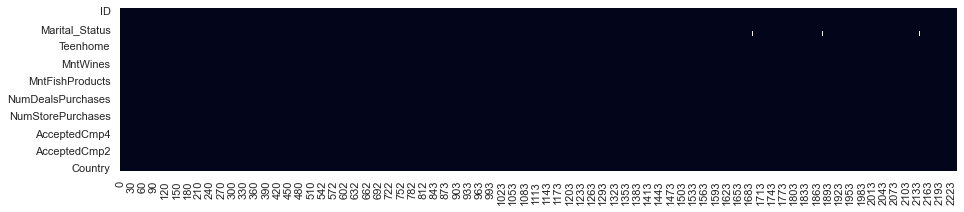

In [399]:
sns.heatmap(df.isnull().T, cbar = False)

We observe that income column has quite a few missing data and instead of droppping them, we'll be imputing them with the median of the dataset. 

In [400]:
df['Income'].fillna(df['Income'].median(), inplace = True)

###  2. Engineering New Variables

In order to achive this subtask, let us first preview our dataset. 

In [401]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,71691.0,0,0,3/17/14,0,336,130,411,240,32,43,1,4,7,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/14,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/14,0,78,0,11,0,0,7,1,2,1,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,65324.0,0,1,1/11/14,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,65324.0,0,1,1/11/14,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,IND


**Based on the preview, we can engineer the following variables**:


**Variables related to spending**:

* Total Amount Spent 
* Amount spent on Meat & Fish.
* Amount Spent on Luxurious Goods(Gold & Wine).


**Variables determining true customer value**:

* Average Purchase Value: Total Spending/Total Purchases 
* Percentage of income spent: (Total Spending/Total Income)*100


**Categorical Variables**

* Engineering Age Group from Year_Birth

        - Young Adult: (1990, 2000]
        - Adult:  (1980, 1990]
        - Middle Aged: (1960,1980]
        - Old: (1940, 1960]

* Engineering Income Category based from Income. The levels are set using qcut which categorizes data based on quartiles
        
        - Low   
        - Medium Low
        - Medium Hgh
        - High


**Variable explaining Customer Preferences**:

*  Frequent Mode of Purchase : Website vs In-store
*  Percentage of purchases made using a discount
*  Percentage of purchases made using a catalog
*  Percentage of purchases made using the website
*  Percentage of purchased made from the store


**Miscellaneous**

* Number of dependants: explains customer's requirements
* Total Accepted Campaigns: explains customer's response to campaigns  


**Adding New Features**

Variables Related to Spending

In [402]:

# Adding total amount spent

cols = [ col for col in df.columns if 'Mnt' in col]
df['total_spending'] =  df[cols].sum(axis = 1)

# Add Amount spent on meat & fish

df['nv_protein_spending'] =  df[['MntFishProducts','MntMeatProducts']].sum(axis = 1) # nv stands for non-veg

# Add Amount spent on luxurious goods

df['luxury_spending'] = df[['MntWines', 'MntGoldProds']].sum(axis = 1)



Variables Determining True Customer Value

In [403]:

df['total_purchase'] = df[['NumStorePurchases','NumWebPurchases','NumCatalogPurchases','NumDealsPurchases']].sum(axis = 1).replace(0,np.nan)

# Adding average customer spending

df['avg_purchase_value'] = df.total_spending/df.total_purchase

# Adding percentage of income spent

df['pct_income_spent'] = np.round(np.multiply(df['total_spending']/(np.multiply(df['Income'],2)), 100),2)




Categorical Variables - Ordinal Categoricals

In [404]:

# Categorizing Year of Birth

bins = [1940, 1960, 1980, 1990, 2000]
age_g = ['Old','Middle Aged','Adult','Young Adult']

df['age_group'] =  pd.cut(df['Year_Birth'], bins, labels = age_g, duplicates = 'drop')   


# Categorizing income levels

income_cats = ['High','Medium High','Medium Low','Low']

df['income_category'] = pd.qcut(df.Income, 4, labels = income_cats)



Variables Explaining Customer Preferences

In [405]:

# Adding percentage of discounted purchases

df['pct_deal_purchase'] = np.round(np.multiply(df['NumDealsPurchases']/df['total_purchase'],100),2)

# Adding percentage of catalog purchases

df['pct_cat_purchase'] = np.round(np.multiply(df['NumCatalogPurchases']/df['total_purchase'],100),2)

# Adding percentage of web purchases

df['pct_web_purchase'] = np.round(np.multiply(df['NumWebPurchases']/df['total_purchase'],100),2)

# Adding percentage of store purchases

df['pct_store_purchase'] = np.round(np.multiply(df['NumStorePurchases']/df['total_purchase'],100),2)



Miscellaneous

In [406]:

# Adding Total Offers Accepted

cols = [col for col in df.columns if 'AcceptedCmp' in col]
cols.extend(['Response'])

df['total_accepted_offrs'] = df[cols].sum(axis = 1)

# Adding Dependants 

df['num_dependants'] = df[['Kidhome','Teenhome']].sum(axis = 1)


### 3. Variable Transformation

The task entails transforming the existing variables to make handling them more efficient during analysis.

Boolean Variables

In [407]:
# Carrying out transformation of boolean variables

bool_cols = [col for col in df.columns if 'AcceptedCmp' in col]
bool_cols.extend(['Response','Complain'])

for col in bool_cols:
    df[col] = df[col].astype('bool')
    

Categoical Variables

In [408]:
# Carrying out transformation of categorical variables

categ_cols = ['Education','Marital_Status','age_group','income_category','Country']

for col in categ_cols:
    df[col]  = pd.Categorical(df[col])

        

#### Examining the newly created variables

This additional sub-task is to check for the quality of the engineered features.

total_spending            AxesSubplot(0.125,0.787927;0.0945122x0.0920732)
nv_protein_spending     AxesSubplot(0.238415,0.787927;0.0945122x0.0920...
luxury_spending         AxesSubplot(0.578659,0.787927;0.0945122x0.0920...
total_purchase          AxesSubplot(0.692073,0.787927;0.0945122x0.0920...
avg_purchase_value      AxesSubplot(0.805488,0.787927;0.0945122x0.0920...
pct_income_spent          AxesSubplot(0.125,0.677439;0.0945122x0.0920732)
total_accepted_offrs    AxesSubplot(0.238415,0.677439;0.0945122x0.0920...
num_dependants          AxesSubplot(0.351829,0.677439;0.0945122x0.0920...
pct_deal_purchase       AxesSubplot(0.465244,0.677439;0.0945122x0.0920...
pct_cat_purchase        AxesSubplot(0.578659,0.677439;0.0945122x0.0920...
pct_web_purchase        AxesSubplot(0.692073,0.677439;0.0945122x0.0920...
pct_store_purchase      AxesSubplot(0.805488,0.677439;0.0945122x0.0920...
dtype: object

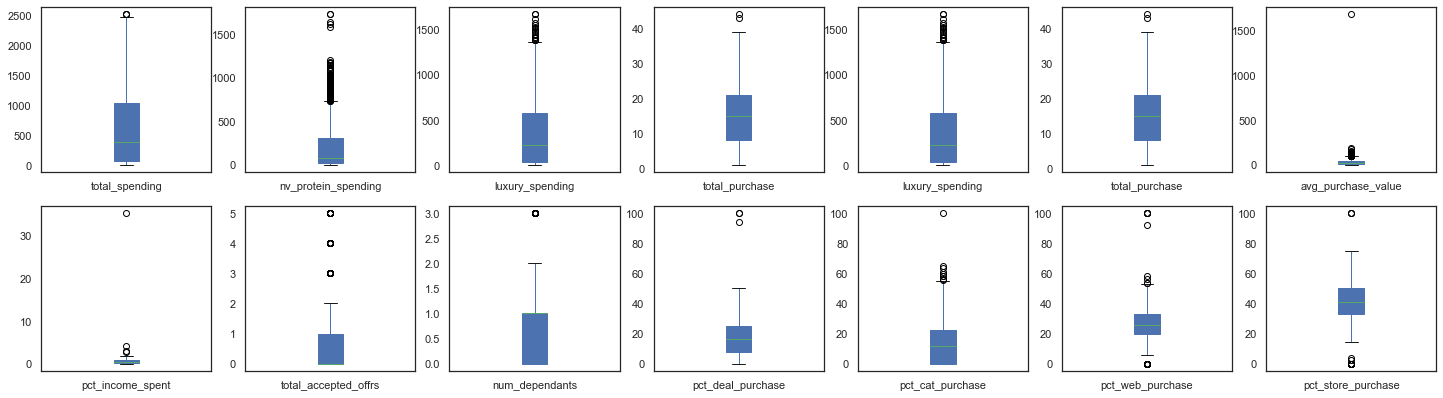

In [409]:
new_vars = ['total_spending','nv_protein_spending','luxury_spending','total_purchase','luxury_spending',
            'total_purchase','avg_purchase_value', 'pct_income_spent','total_accepted_offrs','num_dependants',
            'pct_deal_purchase','pct_cat_purchase','pct_web_purchase','pct_store_purchase']

# df[new_vars].describe()

# df.isna().sum()             
df.dropna(inplace = True)      # Handling null values introduced during the feature engineering stage.

df[new_vars].plot(subplots=True, layout=(7,7), kind='box', figsize=(25,25), patch_artist=True)

### 4.  Patterns & Anomalies in Data

We'll be taking a two fold approach in this section. First, we'll study different kinds of user behaviours bases a certain characteristic - like income levels, education etc; and second, we'll plot a heatmap to look for any surprising and/or significant correlation between unrelated variables. We'll study both the graphs jotting down relevant and insightful observations.



Approach 1

We'll use violin plots in our first approach. It is a combination of a KDE & a box plot, showing us the distribution of data along with some important statistical metrics. The idea is to study different combinations of user characteristics and their associated behaviour in order to find relevant insights. 

Charasteristics refer to things like education, country etc and, user behaviour refer to things like spending habits, lifetime value metrics, preferrred mode of transaction etc. 

The concept would be better understood after studying the code snippet.

In [410]:
# Segregating variables into different categories

#  Categorical variables that describe a user

categ_col = ['Education', 'Marital_Status', 'Country', 'age_group','income_category']


# Different types of user related data

spendings = ['total_spending','nv_protein_spending','luxury_spending']

customer_value = ['total_purchase','avg_purchase_value','pct_income_spent']

customer_preference = ['pct_deal_purchase','pct_cat_purchase','pct_web_purchase','pct_store_purchase']

others = ['Income','num_dependants','total_accepted_offrs','Recency']

val_type = [spendings, customer_value, customer_preference, others]

In [411]:
# Handling Troublesome Outliers before Plotting

dfc  = df.copy()  # Using a copy to avoid loss of data

# dfc = df.where(df.total_spending < 1200)     # Total spendng 

dfc = dfc.where(df.avg_purchase_value < 50)     # Average purchase value
dfc = dfc.where(df.pct_income_spent < 0.8)      # Percentage of income spent

# dfc = dfc.where(df.pct_deal_purchase < 50)    # Percentage of deal purchases
# dfc = dfc.where(df.pct_cat_purchase < 50)     # Percentage of category purchases
# dfc = dfc.where(df.pct_store_purchase < 90)   # Percentage of store purchases

# dfc = dfc.where(df.total_accepted_offrs < 2)  # Total accepted offers

# Creating Categorical Subsets


# dfc  = dfc.where(df.Income < 100000)    # To study behaviours associated with 2 or more characteristics

# Jotting down lengths for plottting purposes 

# categ_cols[] : len = 5
# customer_value[] : len = 3
# customer_preference[]  : len = 4
# spendings[] : len = 3

# dfc.dropna()

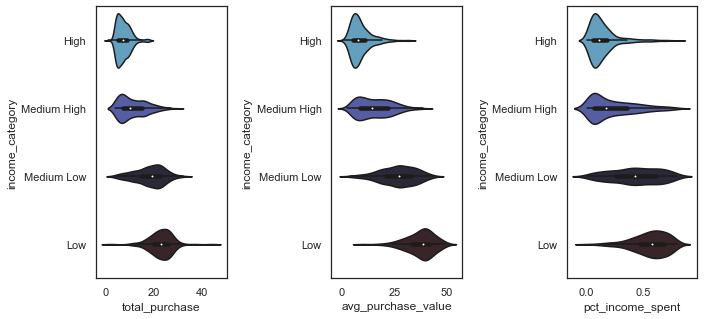

In [412]:
sns.set_palette('icefire')

# The plot sequence

fig = plt.figure(figsize = (15,5))

cat_code = 4
val_code = 1

fig.add_subplot(1,4,1)
sns.violinplot(y = categ_col[cat_code] , x = val_type[val_code][0] , data = dfc)

fig.add_subplot(1,4,2)
sns.violinplot(y = categ_col[cat_code], x = val_type[val_code][1], data = dfc)

fig.add_subplot(1,4,3)
sns.violinplot(y = categ_col[cat_code], x = val_type[val_code][2], data = dfc)

# fig.add_subplot(1,4,4)
# sns.violinplot(y = categ_col[cat_code] , x = val_type[val_code][3] , data = dfc)

plt.subplots_adjust(wspace = 0.8)

In [413]:
# Parameters for significant observation charts:
    
# 1. cat_code = 4 ; val_code = 1  # iterate over all values in val_type
# 2. cat_code = 0 ; val_code = 1
# 3. cat_code = 4 ; val_code = 2 
# 4  cat_code = 2 ; val_code = 3  # plot the graph for income only

After trying out various combinations of user characteristics and their behaviour. we'll be noting down the significant observations. 

Significant Observations:

1. Upon studying the customer value metrics based on income_category, we find that higher income people are the lowest value customers. This can be inferred by lower modal average purchase value and total purchases. A strong marketing campaign can push the percentage of income spent by high and medium high income people towards the right. A similar pattern is observed when we compare spending of different income categories. Though it does seem that lower income people spend more in general.


2. Upon studying the customer value metrics based on education level, we find people with higher education generally spend a higher percentage of their income and have a higher average purchase value. 


3. Studying customer preferences by income category, we see observe that store purchases is the preferred mode of transaction for all income groups. An anamoly here is that lower income people have the least percentage of deal purchases.


4. The consumers in all the countries have roughly have a median income of 50,000 dollars which means financially - we are targeting the same class of people.

Approach 2:

The second approach is fairly straighforward, wherein we'll draw up a correlational heatmap of major user behaviour variables and check for associations among them.

<AxesSubplot:>

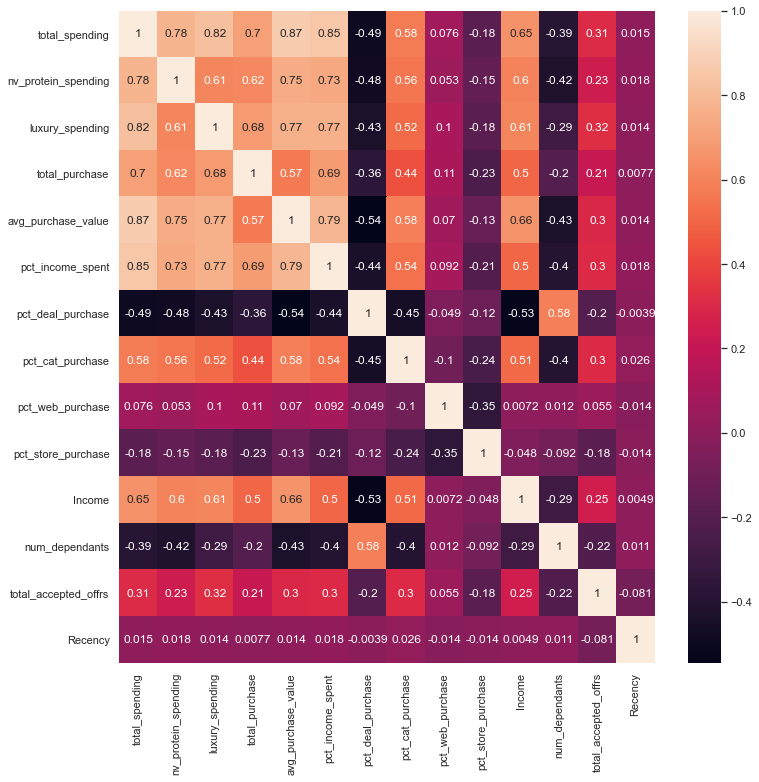

In [414]:
main_val = []

for i in range(4):                      # Collating all related columns
    main_val.extend(val_type[i])
    

sns.set(rc = {'figure.figsize' : (12,12)})
sns.heatmap(df[main_val].corr(method = 'kendall'), annot = True)

From the above chart, we have one significant observation: people who have a higher percentage of deal purchases have lower spending, average purchase value, and related metrics. This calls for strategic placement of deals so as to promote upselling of products. 

We now move onto the next section. 


## Section 02:  Statistical Analysis

The section covers the following sub-tasks:
    
* What factors are significantly related to the number of store purchases?


* Does US fare significantly better than the Rest of the World in terms of total purchases?


* Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test


* Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? 


* Is there a significant relationship between geographical regional and success of a campaign?



### 1. Factors Significantly Related to Number of Store Purchases.

Here we shall collate data that have a strong linear relationship with the number of in-store purchases and plot them on a bar graph to get a comparative understanding. We say a relationship to be strong if the absolute correlational value is greater than 0.5.

We are going to be segregating the positively & negatively related values and plotting them on 2 separate graphs.

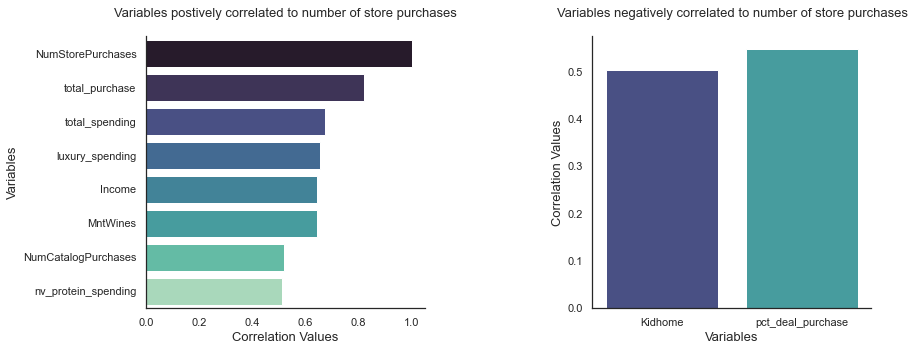

In [415]:
# Setting the aesthetics

sns.set_style('white')


# Positively Correlated Variables

pos_cor = df.corrwith(df.NumStorePurchases).where(df.corrwith(df.NumStorePurchases) > 0.5).dropna().sort_values(ascending = False)

# Negatively Correlated Variables

neg_cor = df.corrwith(df.NumStorePurchases).sort_values(ascending = False).where(df.corrwith(df.NumStorePurchases) < - 0.5).dropna() 


fig = plt.figure(figsize = (13,5))

fig.add_subplot(1,2,1) 

f = sns.barplot(x = pos_cor.values, y = pos_cor.index, palette = "mako")            # Plotting positve linear relationships
sns.despine()

f.set_title('Variables postively correlated to number of store purchases', pad = 20, fontdict = {'size' : 13})
f.set_xlabel('Correlation Values', fontdict = {'size' : 13})
f.set_ylabel('Variables', fontdict = {'size' : 13})

fig.add_subplot(1,2,2)

f = sns.barplot(y = np.abs(neg_cor.values), x = neg_cor.index, palette = 'mako')   # Plottting negative linear relationships
sns.despine()

f.set_title('Variables negatively correlated to number of store purchases', pad = 20, fontdict = {'size' : 13})
f.set_ylabel('Correlation Values', fontdict = {'size' : 13})
f.set_xlabel('Variables', fontdict = {'size' : 13})

plt.subplots_adjust(wspace = 0.6)

**Observations**:

**Positive Correlations**:

Total Purchase has a very strong (0.8) positive correlations with the number of store purchases along with total spending.
Luxury spending and the amount spent on wine have strong correlation with the number of store purchases. However, since luxury spending encapsulated the amount spent on wine and gold, it is ideal to consider the relationship between wine expenditure and number of store purchases to be of significance. 

Income, is also strongly associated with the number of store purchases. The other 2 variables also have decently strong positive correlations. 

**Negative Correlations**:

We see kidhomes and percentage of deal purchases to have significant negative correlations. In essence, people who do majority of their shopping using discount coupons tend to have a lower number of in store purchases and it is the same with people who have kids. 


**Main Insights**:

Based on the above observations, it seems that higher spenders tend to prefer purchasing from store and the economical ones (people who like discounts) prefer using websites. Alternatively, stores might be providing a better experience which drives more sales given the human touch, and the website is proving to be a good option for someone who prefers to stay home with the kids and take advantage of the discounts avaialable to them.

Overall, it can be loosely said that purchasing from stores seems to be the preferred option for the high spending customers or stores have a high upsell percentage causing people to spend more. 

### 2. Comparing US Sales with the Rest of the World.

The task requires us to compare business in the United States with the rest of the world. In order to do this, we'll look at 2 varibles viz. total purchases & total spending. Both of these together determine the value of a business in a particular country. 

We'll look at a summary table that would show us the country wise totals of each of these variables. Later, we'll look at the distribution of these values to further deepen our understanding.  

In [416]:
# Country wise total purchases

country_wise_purchase = df[['total_purchase','Country']].pivot_table(index = ['Country'], aggfunc = 'sum' )
country_wise_purchase = country_wise_purchase.sort_values(by = 'total_purchase', ascending = False)
country_wise_purchase = country_wise_purchase.unstack().unstack()

country_wise_spending = df[['total_spending','Country']].pivot_table(index = ['Country'], aggfunc = 'sum' )
country_wise_spending = country_wise_spending.sort_values(by = 'total_spending', ascending = False)
country_wise_spending = country_wise_spending.unstack().unstack()

pd.concat([country_wise_purchase,country_wise_spending])

Country,SP,SA,CA,AUS,IND,GER,US,ME
total_purchase,16028.0,5102.0,4101.0,2314.0,2093.0,1788.0,1761.0,59.0
total_spending,660204.0,210981.0,168524.0,89763.0,79415.0,74913.0,67882.0,3122.0


The above table clearly indicates that US ranks second to last in business. It would be interesting to understand the distribution of data in these features to evaluate  market opportunitites.    

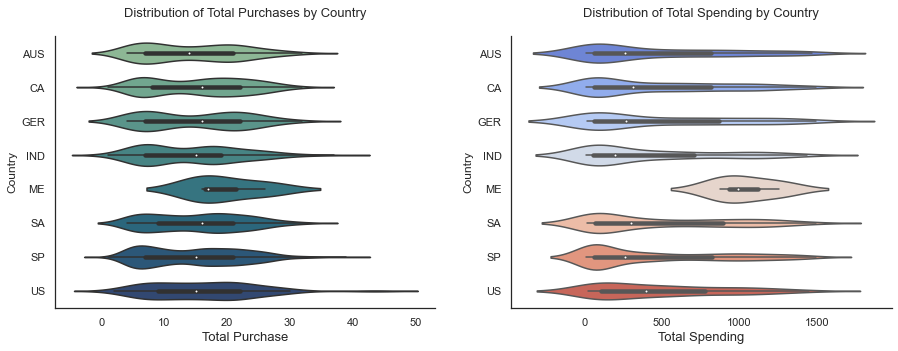

In [417]:
# Distribution of total purchases by country
fig = plt.figure(figsize = (15,5))

fig.add_subplot(1,2,1)

p = sns.violinplot(y = df.Country, x = df.total_purchase, palette = "crest" )
sns.despine()

p.set_title('Distribution of Total Purchases by Country', pad = 20, fontdict = {'size' : 13})
p.set_xlabel('Total Purchase', fontdict = {'size' : 13})

fig.add_subplot(1,2,2)

s = sns.violinplot(y = df.Country, x = df.total_spending.where(df.total_spending < 1500),
                   palette = "coolwarm")  # prevent distortion of pattern 
sns.despine()

s.set_title('Distribution of Total Spending by Country', pad = 20, fontdict = {'size' : 13})                                   # by outliers
s.set_xlabel('Total Spending', fontdict = {'size' : 13})                                                                      


plt.subplots_adjust(wspace = 0.2)

Looking at the chart of total purchases, we see that American consumers are equally spread out between consumers who have 10, 20 & 30 purchases with the median amount of purchase being 15. It just seems that market penentration in US is quite low which is amounting to the lower number of total purchases.  

The chart of total spending suggests that most American consumers spend about $ 100 in total. A similar pattern is observed for all other countries as well. 

This means that not only does the company have to work on increasing the number of customers in the US but also in increasing the modal value of total purchases. Graphically, it can be thought of as pushing the peak the distribution to the right in the total spendings chart. Considering all countries have a similar distribution, this calls for a need to upsell the products and/or introduce new products in order to increase modal total spending value. 


###  3. Exploring Relationship Between Number of Store Sales & Amount Spent on Gold.

Here, we are to assess if there is a relationship between people who spend an above average amount on gold to the number of store purchases. Specifically, we are to determine if people who spend an above average amount in gold have more in store purchases in lieu of them being more conservative. 

We'll evaluate the distribution of both these variables and observe the linear relationships between them.

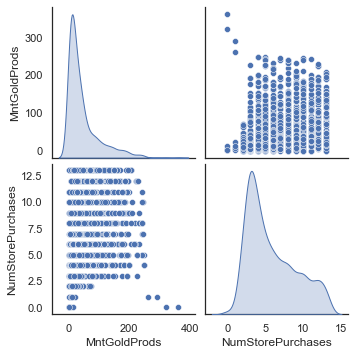

In [418]:
# Storing Correlation Value for reference

corr = df.MntGoldProds.corr(df.NumStorePurchases)
#corr

# Using pairplot to plot the graph

sns.pairplot(df[['MntGoldProds','NumStorePurchases']], diag_kind = 'kde',)

Correlation Value: 0.3816966266074834

There is a correlation of 0.381 indicating a weak positive linear association. This means that there is a fair chance of people spending more on gold having more in store purchases. To further investigate this, let's divide up gold buyers into below average and above average depending on the amount spent and compare their mean in store purchases. 

As observed in the above graph, the distribution of expenditure on gold is skewed to the right causing the mean value to increase rendering it unsuitable for use. Median is not affected by outliers and therefore would be an ideal candidate to meaure the central tendency of this dataset. 

Displayed below is a summary table comparing the 2 averages. 

In [419]:
# Comparing store purchases of gold buyers

ns1 = df.NumStorePurchases.where(df.MntGoldProds < df.MntGoldProds.median()).mean()
ns2 = df.NumStorePurchases.where(df.MntGoldProds > df.MntGoldProds.median()).mean()

comp_store_sales = pd.DataFrame({ 'Below Average' : ns1 ,
                                  'Above Average' : ns2 
                                }, index = ['Average Store Purchases'])

comp_store_sales.columns.name = 'Gold Sales'

comp_store_sales

Gold Sales,Below Average,Above Average
Average Store Purchases,4.343119,7.252244


We observe that people who spend an above average amount of gold have on average, greater number of in-store purchases.
This gives us further evidence into the hypothesis that gold buying people would be conservative and thus have higher number of in store purchases. 

The question that occurs here: is being conservative the reason for more in-store purchases or are there any other factors involved? There is a possiblity that people would simply prefer buying gold in the store as as it is a highly valuable and expensive commmodity. 

There could be other confounding variables such as people from a certain geography where the company's website is unreliable believe in gold as an investment. In such cases the higher number of store purchases would be driven by the unreliability of the website. 

The only way to know for sure to set up an experiment and test the statistical significance of the results using p value.
In this case, a sure way to know would be conduct experiments that would rule out all other possibilities

Note: it is tempting to use p values on this dataset to check for statistical significance, however it wouldn't be accurate to do so since we are working with observational data. p-values are used to check if the difference in results found in the control and treatment groups is due to the treatment or simply a matter of chance which would be a function of sampling error. 
They do not cover for the affect of confounding variables which could be present in the observational data. 

In conclusion, people who have spent more on gold are observed to have a higher average store purchases. Whether it is because they are conservative or not remains unanswered.


### 4.  Relationship between Geographical Region and success of campaign

We'll be grouping campaign performance data by countries and looking at country wise performance for each campaign. The goal here is to compare performance of a campaign among different countries, and not the overall success of campaigns. 

After we plot the data, we'll assess what campaigns worked best in what country and look for any patterns in campaign performance in geographies. 

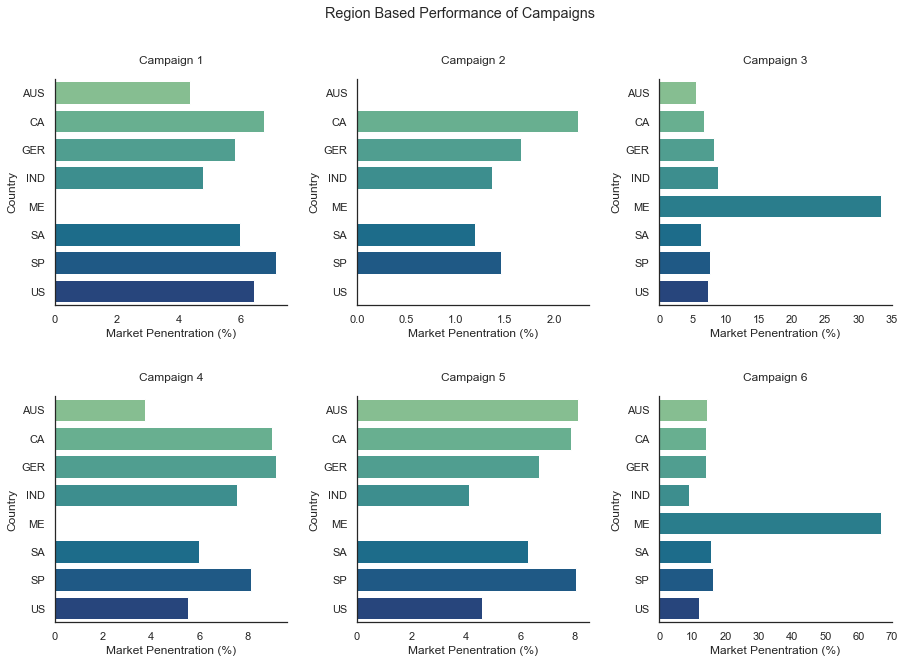

In [420]:
#  Aesthetics

sns.set_style('white')

# Plotting a summary of country wise market penentration of campaigns

cmps = [col for col in df.columns if 'Accepted' in col]
cmps.extend(['Response','Country'])
cmps.sort()

data = np.multiply(df[cmps].groupby(df.Country).mean(),100)

cmps.remove('Country')

fig, axes = plt.subplots(2,3, figsize = (15,10))

fig.suptitle('Region Based Performance of Campaigns', fontdict = {'size' : 15})

idx = 0

for row in range(2):
    for col in range(3):

        P = sns.barplot( y = data.index, x = data[cmps[idx]], ax = axes[row,col], palette = 'crest', saturation = 1)
        sns.despine()
#         P.set( xticks = np.arange(0,100,10))
        
        P.set_xlabel('Market Penentration (%)', {'size' : 12})
        P.set_ylabel('Country', fontdict = {'size' : 12})
        
        P.set_title('Campaign ' + str(idx + 1), fontdict = {'size' : 12}, pad = 15)
        
        idx = idx + 1
    
            
        
        
plt.subplots_adjust(hspace = 0.4, wspace = 0.3)       

**Assumption**: All countries were exposed to each of the 6 campaigns in the same order. 
            
**Patterns & Trends**: 

We observe right away that campaigns 3 & 6 have significantly higher market penenetration in Mexico, with the most recent campaign having a market penentration of 65% ! On the contrary, the other four campaigns did not work in Mexico at all. Campaigns 1,4,& 5 have higher penentration rates in the countries: Canada, Germany, & Spain. And, in general, Canada seems to be the most receptive to marketing campaigns. Campaign 2 has extremely row market penentration

It is to be noted that while campaigns 3 & 6 have done especially well in Mexico, their penentration rate in other geographies is comparable to those of other campaigns with campaign 6 having the best response overall.

The suceess of campaign 6 could be attributed to not only a better strategy but a higher budget as well. And considering its performance pattern being somewhat similar to campaign 3, a higher budget does seem to be a contributing factor here. 

India & South Africa had some market penentration in all campaigns however their response rate is average in all of them, hinting at a need for specialized campaigns for these two countries. 

Australia & US have responded well to campaigns 1 & 5. 

**Actionables**:

From the above discussion, it seems reasonbale to invest more money into the ideas behind campaigns 1,4, & 5 so as to imporve the response rate in western countries. Given the average performance of campaigns in India & South Africa - setting up a team to study those markets and coming up with new campaign ideas targeted at these markets could prove fruitful.

### 5. Exploring Relationship between Married PhD Candidates and Amount Spent on Fish. 

This is actually a 2 part task, the first one is to answer if people who are more educated (Married Phd Candidates) spend more on fish. And second is to look at factors that are related to amount spent on fish.

We'll achieve this by drawing up a summary table that would answer the first part. The second part would be handled by looking at, and comparing the distribution of amount spent on fish across categorical values & secondly by looking our numeric variables with significant correlations to the amount spent on fish.  

**Part 1**

This part simply looks to answer if Married Phd candidates spend a higher amount on fish. For this, we'll draw up a two way categorical table consisting of marital status & education as the 2 categories and displaying the mean amount spent for each pair of values between the 2 categories.  

In [421]:
pd.crosstab(df['Education'],df['Marital_Status'], values = df['MntFishProducts'], aggfunc = 'median')

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,12.0,17.0,22.5,21.0,97.0,NaN
Basic,NaN,NaN,10.0,11.0,8.0,8.0,34.0,NaN
Graduation,212.0,19.0,10.0,15.0,16.0,13.0,28.0,NaN
Master,199.0,0.0,10.0,6.0,8.0,11.0,30.0,NaN
PhD,NaN,4.0,10.5,4.0,7.0,6.0,12.5,4.0


The median amount spent on fish by married Phd candidates $ 4 which is much lower than most other pair of values. This means that even if there is any relationship between married Phd candidates and the amount they spend on fish. It would be irrelevant given that they spend very little on fish.  

**Part 2A**

Here, we'll see if any user charasteristic is related to the amount spent on fish. We'll be using a series of box plots to do our analysis. 

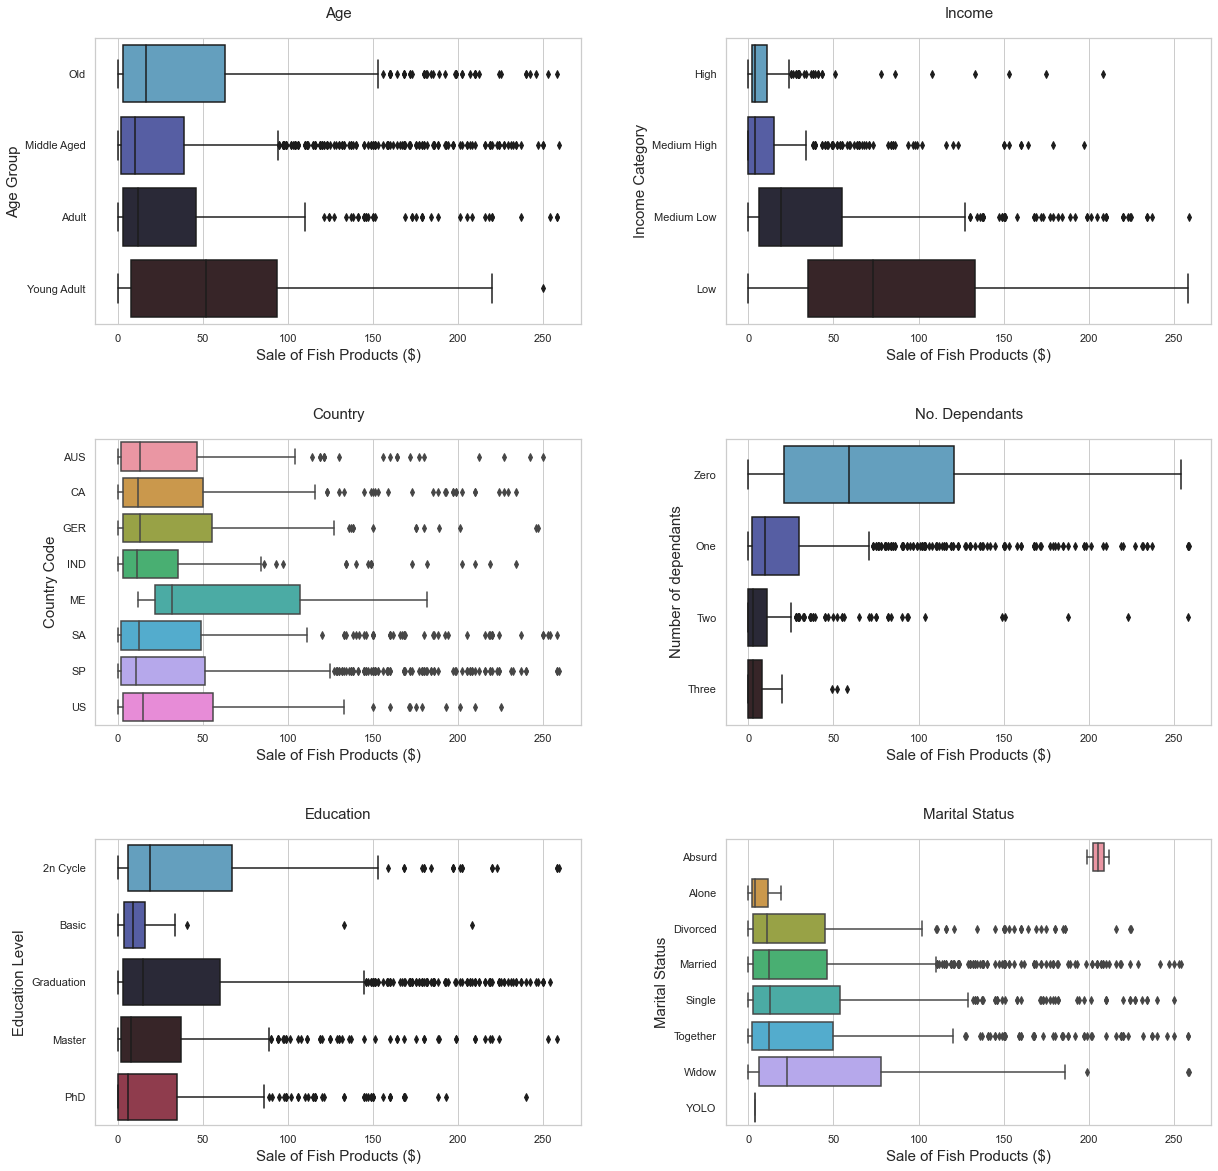

In [422]:
fig = plt.figure(figsize = (20,20))
sns.set_style('whitegrid')
sns.set_palette('icefire')

# Age

fig.add_subplot(3,2,1)


A = sns.boxplot(x = df['MntFishProducts'], y = df['age_group'])

A.set_title('Age', fontdict = {'size': 15}, pad = 20)

A.set_ylabel('Age Group', fontdict = {'size': 15})
A.set_xlabel('Sale of Fish Products ($)', fontdict = {'size': 15})

# Income

fig.add_subplot(3,2,2)

I = sns.boxplot(x = 'MntFishProducts', y = 'income_category', data = df)


I.set_ylabel('Income Category', fontdict = {'size': 15})
I.set_xlabel('Sale of Fish Products ($)', fontdict = {'size': 15})

I.set_title('Income', fontdict = {'size': 15}, pad = 20)

# Country

fig.add_subplot(3,2,3)

C = sns.boxplot(x = 'MntFishProducts', y  = 'Country', data = df)


C.set_ylabel('Country Code', fontdict = {'size': 15})
C.set_xlabel('Sale of Fish Products ($)', fontdict = {'size': 15})


C.set_title('Country', fontdict = {'size': 15}, pad = 20)

# Number of Dependants

fig.add_subplot(3,2,4)

df.num_dependants = pd.Categorical(df.num_dependants)

D = sns.boxplot(x = 'MntFishProducts', y  = 'num_dependants', data = df)

D.set_ylabel('Number of dependants', fontdict = {'size': 15})
D.set_xlabel('Sale of Fish Products ($)', fontdict = {'size': 15})

D.set_title('No. Dependants', fontdict = {'size': 15}, pad = 20)

D.set_yticklabels(['Zero','One','Two','Three'])

# Education Level

fig.add_subplot(3,2,5)

E = sns.boxplot(x = 'MntFishProducts', y  = 'Education', data = df)


E.set_ylabel('Education Level', fontdict = {'size': 15})
E.set_xlabel('Sale of Fish Products ($)', fontdict = {'size': 15})

E.set_title('Education', fontdict = {'size': 15}, pad = 20)

# Marital Status

fig.add_subplot(3,2,6)

M = sns.boxplot(x = 'MntFishProducts', y  = 'Marital_Status', data = df)


M.set_ylabel('Marital Status', fontdict = {'size': 15})
M.set_xlabel('Sale of Fish Products ($)', fontdict = {'size': 15})

M.set_title('Marital Status', fontdict = {'size': 15}, pad = 20)



# fig.add_subplot(1,5,4)

# sns.boxplot(x = 'MntFishProducts', y = 'Education', data = df)

# fig.add_subplot(1,5,5)

# sns.boxplot(x = 'MntFishProducts', y = 'Marital_Status', data = df)

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

The black line inside of the boxes represent the median. Upon tracking them, we find that younger people tend to spend more on fish, as well as those with lower income. People with no children have higher spending on fish. All in all, the following three user characteristics are associated with higher spending on fish: 1. Lower Income. 2. Young age. 3. No Dependants

**Part 2B**

This part looks at major numeric variables associated with the amount spent on fish. The table below lists them out. 
The first 5 repsent those that are positively correlated and the next 5, those that are negatively correlated.

In [423]:
vals = pd.DataFrame(df.select_dtypes(include = ['float64',np.number]).corrwith(df.MntFishProducts),
                    columns = ['Correlation with Fish Sales'])

# Variables with positive correlations

vals_dec = vals.sort_values(by = 'Correlation with Fish Sales', ascending = False)[:5]

# Variables with negative correlations

vals_asc = vals.sort_values(by = 'Correlation with Fish Sales')[:5]

# Stacking them together as a single table

pd.concat([vals_dec, vals_asc]).unstack().unstack()

,MntFishProducts,nv_protein_spending,total_spending,MntFruits,MntSweetProducts,pct_deal_purchase,NumWebVisitsMonth,Kidhome,Teenhome,NumDealsPurchases
Correlation with Fish Sales,1.0,0.701024,0.641883,0.594021,0.579078,-0.496638,-0.448686,-0.388611,-0.205893,-0.141198


Positively Related:

1. We see people with higher total spending have a fairly strong linear positive relationship with amount spent on fish.
2. We observe kind of an odd correlation between the amount spent on fruits & sweet products with that spent on fish. While it hard to understand the reason behind this. It would surely make sense to place these products in close vicinity to one another so as to promote upselling. 

Negatively Related:

1. It seems that people who choose to do majority of their purchase through deals, do not prefer spending on fish products. 
2. The other variables (except for NumWebVisitsMonth, which is irrelevant) simply validate our previous findings. 


## Section 03: Data Visualisation

This is a straighforward section wherein we'll simply draw up the plots asked of us and let them do most of the commmunication. The section entails the following tasks meant to be achieved by visualisation:

* Which marketing campaign is most successful?
* What does the average customer look like for this company?
* Which products are performing best?
* Which channels are underperforming




### 1. The Most Successful Marketing Campaign

Text(0.5, 1.0, 'Performance of Marketing Campaigns')

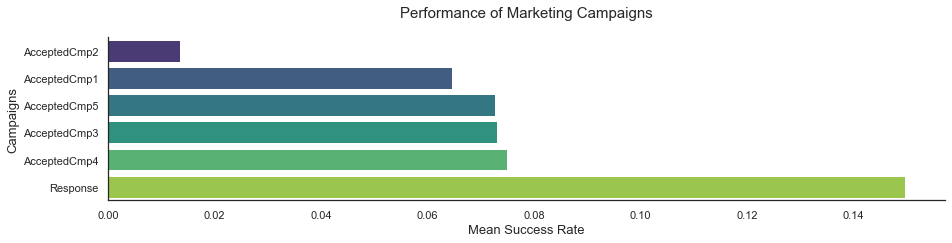

In [424]:
sns.set(rc = {'figure.figsize' : (15,3)})
sns.set_style('white')                                 

cmp_data = df[cols]

cmps = sns.barplot(x = cmp_data.mean().sort_values().values, y = cmp_data.mean().sort_values().index, palette = 'viridis')
sns.despine()

cmps.set_xlabel('Mean Success Rate', fontdict = {'size': 13})
cmps.set_ylabel('Campaigns', fontdict = {'size': 13})

cmps.set_title('Performance of Marketing Campaigns', fontdict = {'size': 15}, pad = 20 )

### 2. Customer Demographics

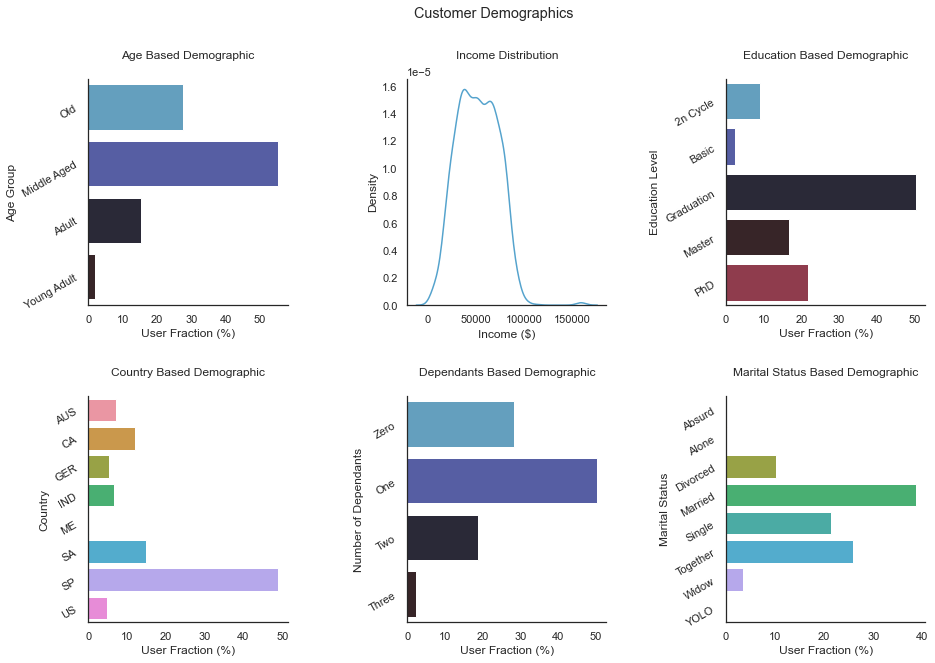

In [425]:
sns.set_palette('icefire')

fig, axes = plt.subplots(2,3, sharex = False, figsize = (15,10))
fig.suptitle('Customer Demographics')

# Age

sns.barplot( ax = axes[0,0],
             y = df.age_group.value_counts().apply(lambda x: (x/df.age_group.value_counts().sum())*100 ).index,
             x = df.age_group.value_counts().apply(lambda x: (x/df.age_group.value_counts().sum())*100 ).values,
               )
sns.despine()

axes[0,0].set_title('Age Based Demographic', pad = 20)

axes[0,0].set_ylabel('Age Group')
axes[0,0].set_xlabel('User Fraction (%)')

axes[0,0].set_yticklabels(['Old','Middle Aged','Adult','Young Adult'], rotation = 30)


# Income Category

sns.kdeplot(df.Income, ax = axes[0,1])
sns.despine()

axes[0,1].set_title('Income Distribution', pad = 20)

axes[0,1].set_xlabel('Income ($)')

# Education

sns.barplot( ax = axes[0,2],
             y  = df.Education.value_counts().apply(lambda x: (x/df.Education.value_counts().sum())*100 ).index,
             x = df.Education.value_counts().apply(lambda x: (x/df.Education.value_counts().sum())*100 ).values
             )
sns.despine()

axes[0,2].set_title('Education Based Demographic', pad = 20)

axes[0,2].set_ylabel('Education Level')
axes[0,2].set_xlabel('User Fraction (%)')

axes[0,2].set_yticklabels(['2n Cycle','Basic','Graduation', 'Master','PhD'], rotation = 30)

# Country 



sns.barplot( ax = axes[1,0],
             y  = df.Country.value_counts().apply(lambda x: (x/df.Country.value_counts().sum())*100 ).index,
             x = df.Country.value_counts().apply(lambda x: (x/df.Country.value_counts().sum())*100 ).values
             )
sns.despine()

axes[1,0].set_title('Country Based Demographic', pad = 20)

axes[1,0].set_ylabel('Country')
axes[1,0].set_xlabel('User Fraction (%)')

axes[1,0].set_yticklabels([ 'AUS','CA','GER','IND','ME','SA', 'SP', 'US'], rotation = 30)


# Dependants 

df.num_dependants = pd.Categorical(df.num_dependants)

sns.barplot( ax = axes[1,1],
             y  = df.num_dependants.value_counts().apply(lambda x: (x/df.num_dependants.value_counts().sum())*100 ).index,
             x =  df.num_dependants.value_counts().apply(lambda x: (x/df.num_dependants.value_counts().sum())*100 ).values
             )
sns.despine()

axes[1,1].set_title('Dependants Based Demographic', pad = 20)

axes[1,1].set_xlabel('User Fraction (%)')
axes[1,1].set_ylabel('Number of Dependants')

axes[1,1].set_yticklabels(['Zero','One','Two','Three'], rotation = 30)


# Marital Status

sns.barplot( ax = axes[1,2],
             y  = df.Marital_Status.value_counts().apply(lambda x: (x/df.Marital_Status.value_counts().sum())*100 ).index,
             x = df.Marital_Status.value_counts().apply(lambda x: (x/df.Marital_Status.value_counts().sum())*100 ).values
             )
sns.despine()

axes[1,2].set_title('Marital Status Based Demographic', pad = 20)

axes[1,2].set_ylabel('Marital Status')
axes[1,2].set_xlabel('User Fraction (%)')

axes[1,2].set_yticklabels(['Absurd', 'Alone','Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO'], rotation = 30)


plt.subplots_adjust(wspace = 0.6, hspace = 0.4)

### 3. Best Performing Products

Text(0.5, 0, 'Product')

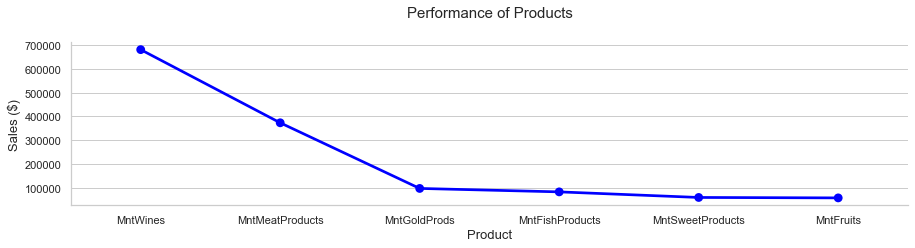

In [426]:

mntcols = [col for col in df.columns if 'Mnt' in col]

sns.set(rc = {'figure.figsize': (15,3)}, style = 'whitegrid')
 
M = sns.pointplot( y = df[mntcols].sum().sort_values(ascending = False).values, 
                   x = df[mntcols].sum().sort_values(ascending = False).index,
                   color = 'blue'
                  )
sns.despine()

M.set_title('Performance of Products', fontdict = {'size' : 15}, pad = 25)

M.set_ylabel('Sales ($)', fontdict = {'size': 13 })
M.set_xlabel('Product', fontdict = {'size': 13 })



###  4. Performance of Channels

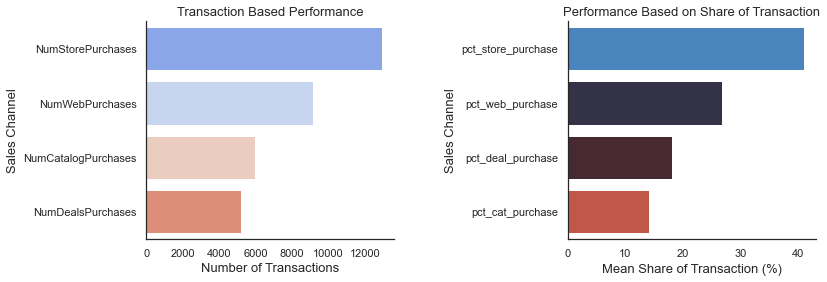

In [427]:
sns.set_style('white')

fig = plt.figure(figsize = (12,4))

# Performace based on raw numbers

fig.add_subplot(1,2,1)

channels = [col for col in df.columns if 'Num' in col]
channels.remove('NumWebVisitsMonth')

R = sns.barplot( x = df[channels].sum().sort_values(ascending = False).values, 
                 y = df[channels].sum().sort_values(ascending = False).index, 
                 palette = 'coolwarm') 
sns.despine()

R.set_xlabel('Number of Transactions', fontdict = {'size': 13})
R.set_ylabel('Sales Channel', fontdict = {'size': 13})

R.set_title('Transaction Based Performance', fontdict = {'size': 13})

# Performance based on mean share of purchase channels

fig.add_subplot(1,2,2)

P = sns.barplot( x = df[customer_preference].mean().sort_values(ascending = False).values,
                 y = df[customer_preference].mean().sort_values(ascending = False).index,
                 palette = 'icefire')
sns.despine()

P.set_xlabel('Mean Share of Transaction (%)', fontdict = {'size': 13})
P.set_ylabel('Sales Channel', fontdict = {'size': 13})

P.set_title('Performance Based on Share of Transaction', fontdict = {'size': 13})
plt.subplots_adjust(wspace = 0.7)

## Section 04: CMO Recommendations

This is the section wherein we'll be giving our final recommendations basis our analysis.

**The Goal: Improve the Effectiveness of Future Marketing Campaigns.**

**Observed Pain Points**:

USA & Mexico seem to have low reach. Both of these countries have the lowest sales figures. In spite of having the highest campaign acceptance rate - Mexico has the lowest sales. This means effort needs to be put in growing the market size in this country and in the USA.  

The markets of India & South Africa have low average response rate to campaigns which calls for speacialized campaigns in these regions.  

Another aspect is targeting the high income consumers. We found that this segment of customers have the lowest average purchase value. This means there is a need for campaigns that would capture this side of the market.

Finally, few observation such as the negative correlations between people with higher percentage of deal purchases and spending (given that these are actually high income earners) and positive correlation between some unrelated products suggest that better upselling tactics could improve the overall sales. 

The recommendations would look to solve for all these pain points taking into account the insights we've got from analyzing campaign data.

**Recommendation**:

1. Design & invest in marketing campaigns that would generate brand awareness amongst the high income earners in the countries of USA & Mexico. 


2. Formulate specialized campaigns for the countries of India & South Africa respectively, and invest more in the idea behind either of campaigns 1, 4, or 5 which have done comparatively well in western countries. 


3. Formulate a product discount stategy such as offering a discount on a product that is found to have a significant correlation with a product that a person has already bought and include their promotion in the campaigns targeting high income people. This would improve the average customer value and reach.